# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [7]:
!pip install numpy, pandas, matplotlib, seaborn, warnings

zsh:1: command not found: pip


In [4]:
print("hello world")


hello world


In [8]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.2 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 7.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [33]:
!{sys.executable} -m pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/lj/q60gsp452vs5l7xmtn778jn80000gn/T/pip-install-5ko394dd/sklearn_8d62980a2d0144ccaa37162b928944a2/setup.py'"'"'; __file__='"'"'/private/var/folders/lj/q60gsp452vs5l7xmtn778jn80000gn/T/pip-install-5ko394dd/sklearn_8d62980a2d0144ccaa37162b928944a2/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/lj/q60gsp452vs5l7xmtn778jn80000gn/T/pip-pip-egg-info-mre2r9b_
         cwd: /private/var/folders/lj/q60gsp452vs5l7xmtn778jn80000gn/T/pip-install-5ko394dd/sklea

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe = pd.read_csv('Wholesale_Data.csv')
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#Check for missing values
dataframe.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [20]:
#Change channel and region to object
dataframe['Channel'] = dataframe['Channel'].astype('object')
dataframe['Region'] = dataframe['Region'].astype('object')

In [21]:
dataframe.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Channel is nominal 
Region is nominal 
Fresh - annual spending on fresh products 
Milk - annual spending on milk products 
Grocery - annual spending on grocery products 
Frozen - annual spending on frozen products 
Detergents and Paper - annual spending on detergents products
Delicassen - annual spending on delicassen products

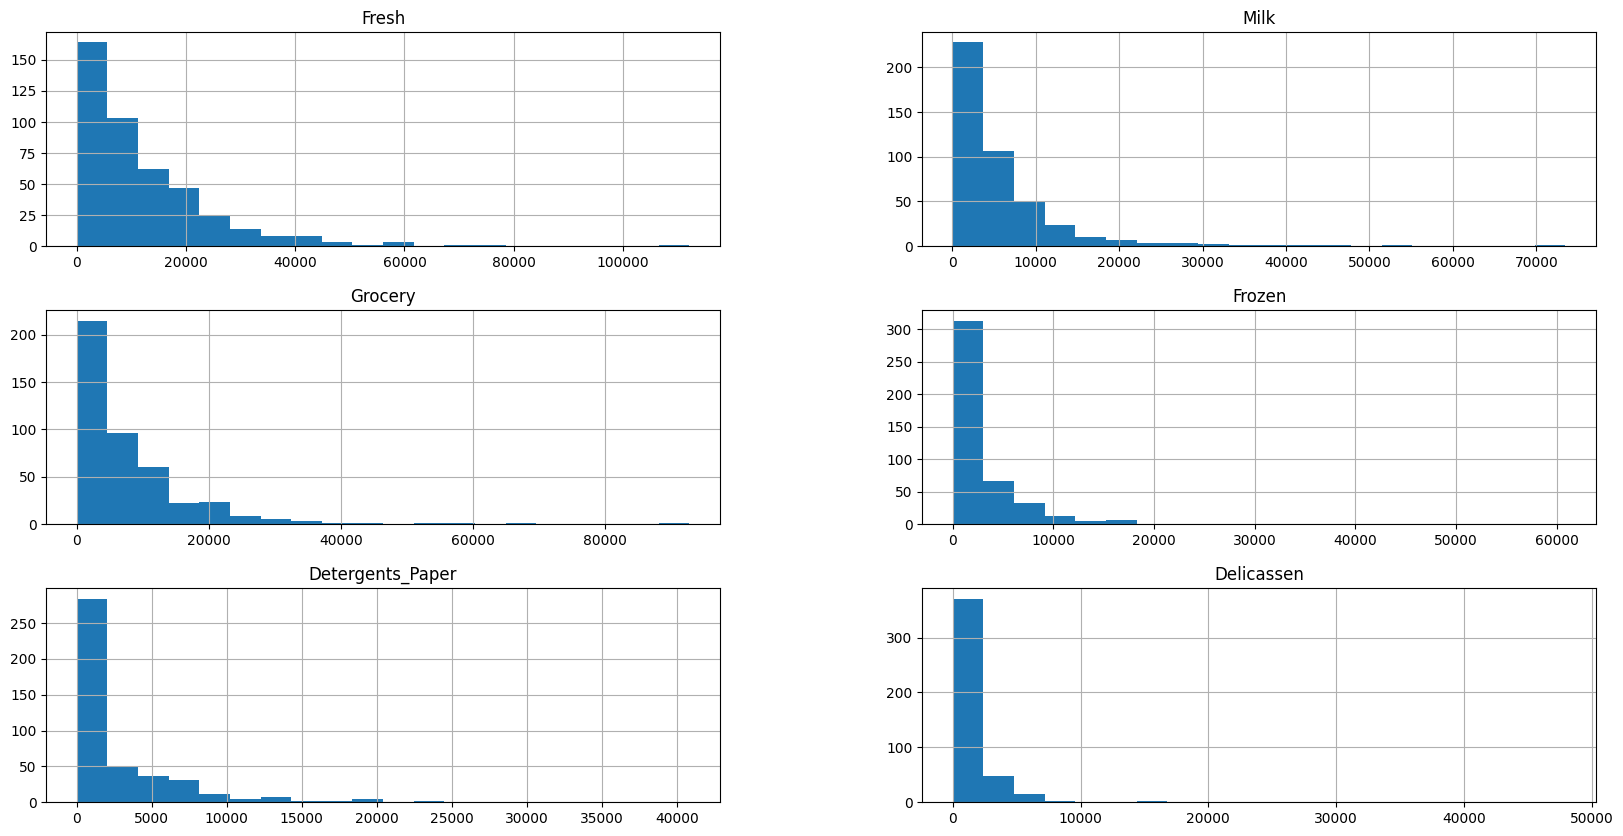

In [22]:
#plots 
#histogram of all the continuous variables
dataframe.hist(bins=20, figsize=(20,10))
plt.show()
#they are all right skewed


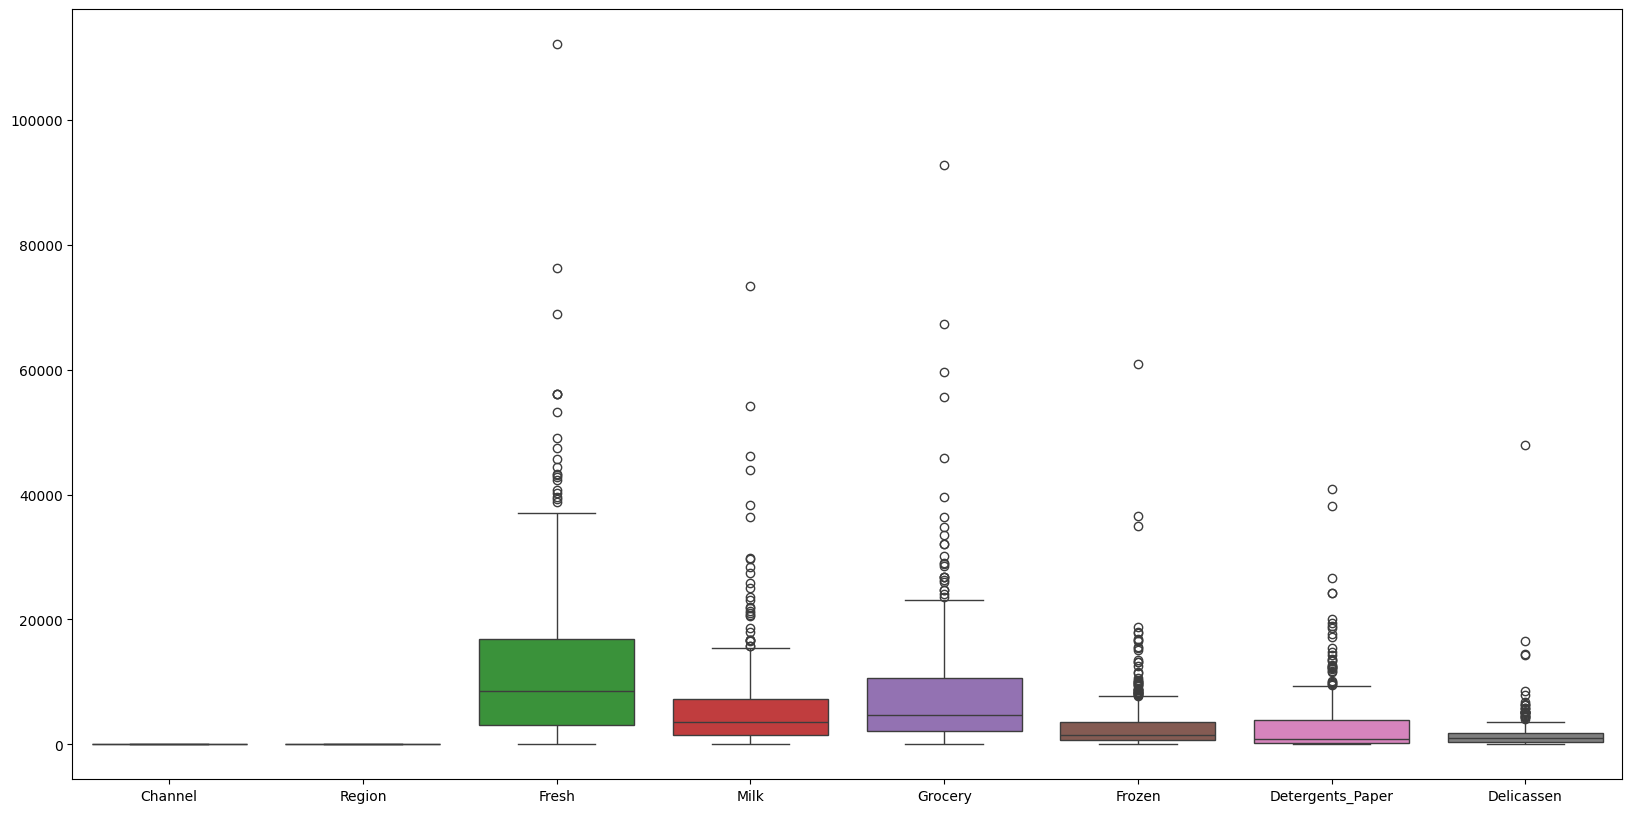

In [23]:
#Boxplot of all the continuous variables
plt.figure(figsize=(20,10))
sns.boxplot(data=dataframe)
plt.show()

<Figure size 2000x1000 with 0 Axes>

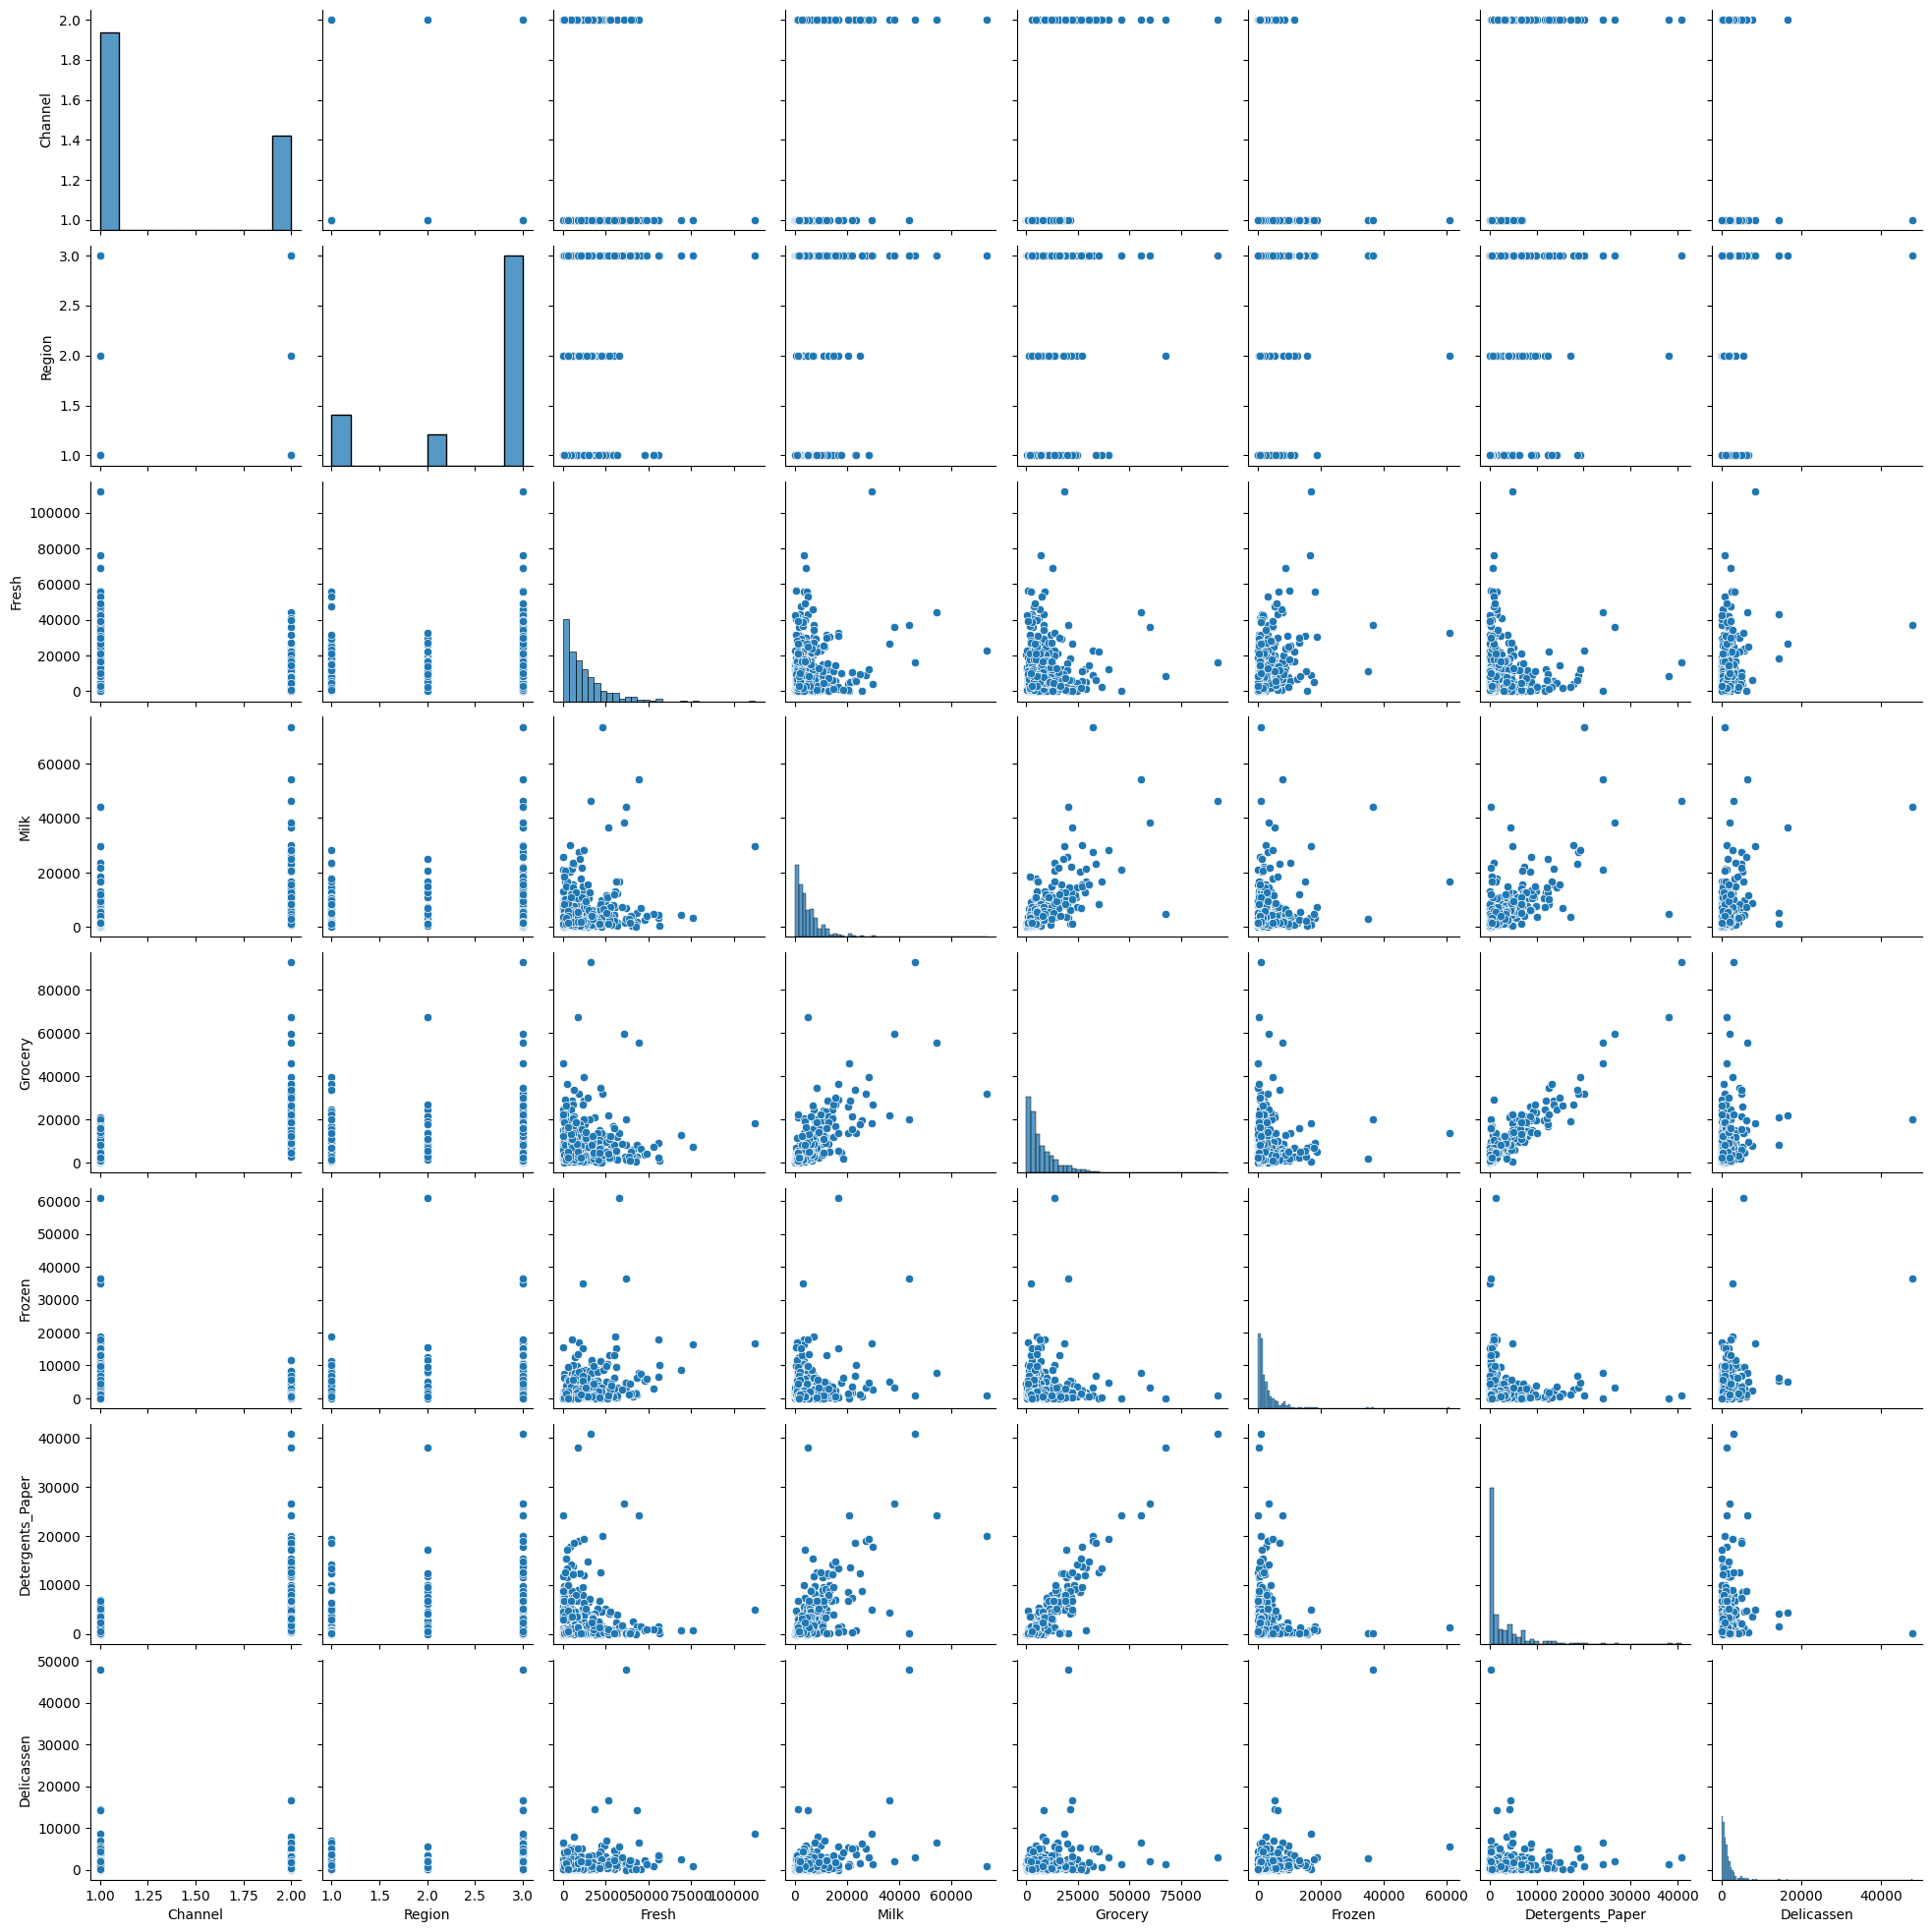

In [24]:
#Scatter plot of all the continuous variables, no channel and region 
plt.figure(figsize=(20,10))
sns.pairplot(dataframe)
plt.show()

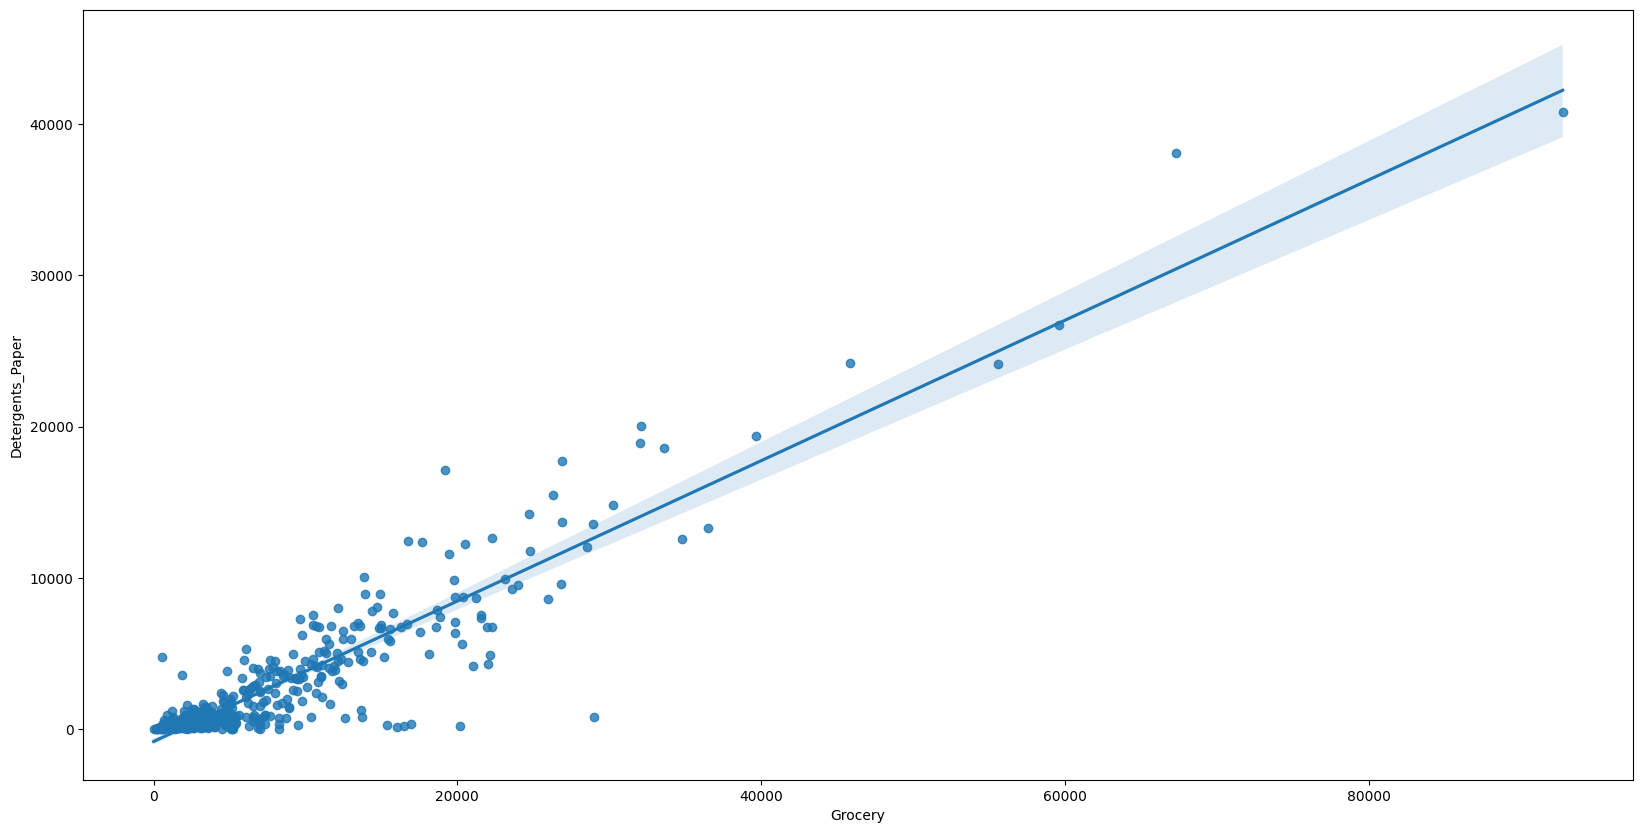

In [26]:
#Grocery and Detegrants_Paper seem to have a linear relationship
#Check 
plt.figure(figsize=(20,10))
sns.regplot(data=dataframe, x='Grocery', y='Detergents_Paper')
plt.show()

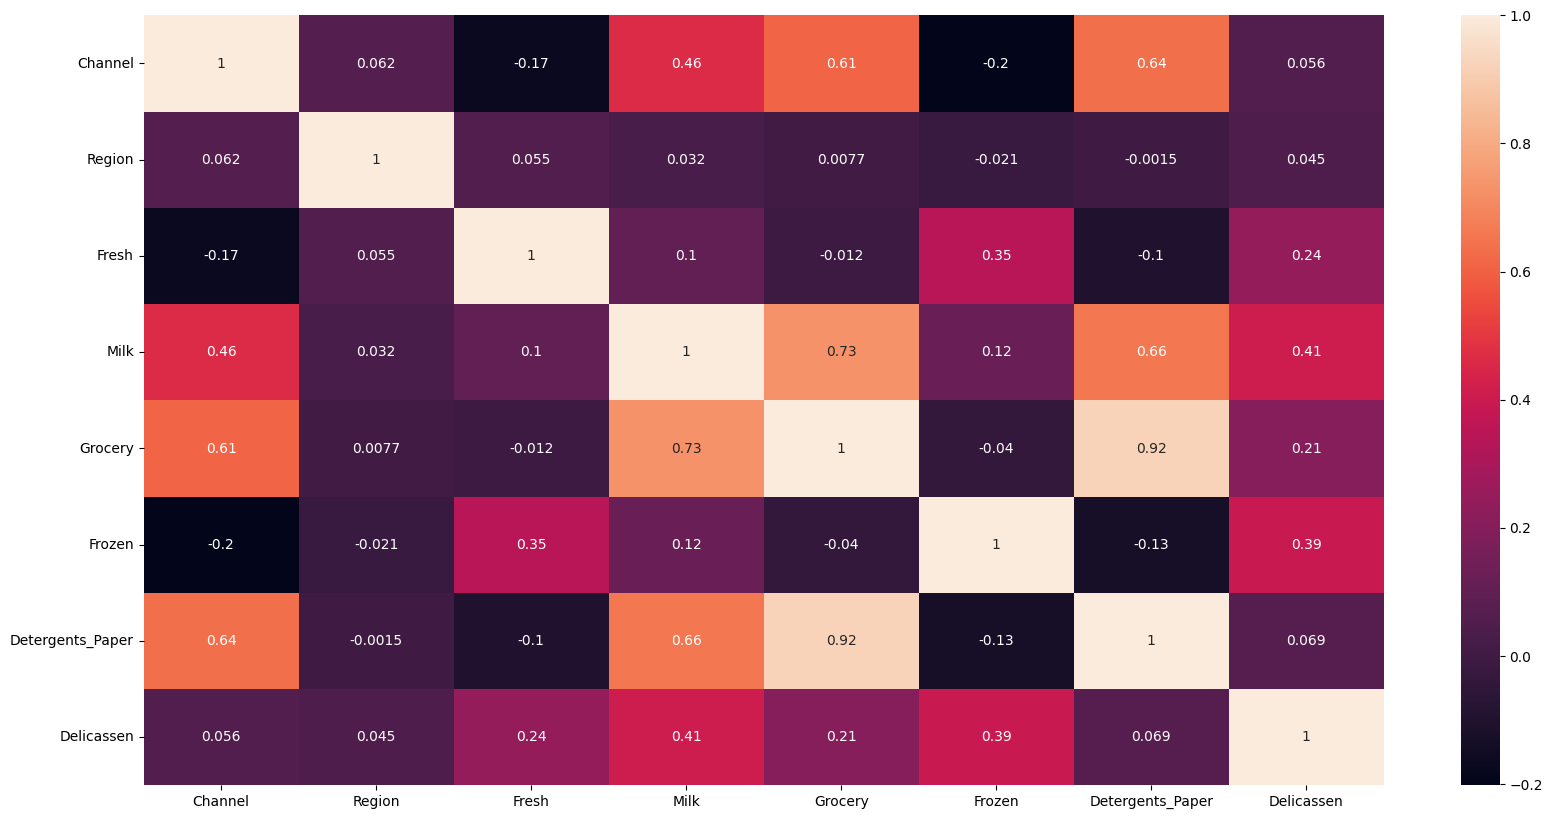

In [27]:
#Correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr(), annot=True)
plt.show()

In [6]:
# Select only the numeric columns
numeric_cols = dataframe.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Only keep rows in the dataframe that do not have outliers in the numeric columns
dataframe = dataframe[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

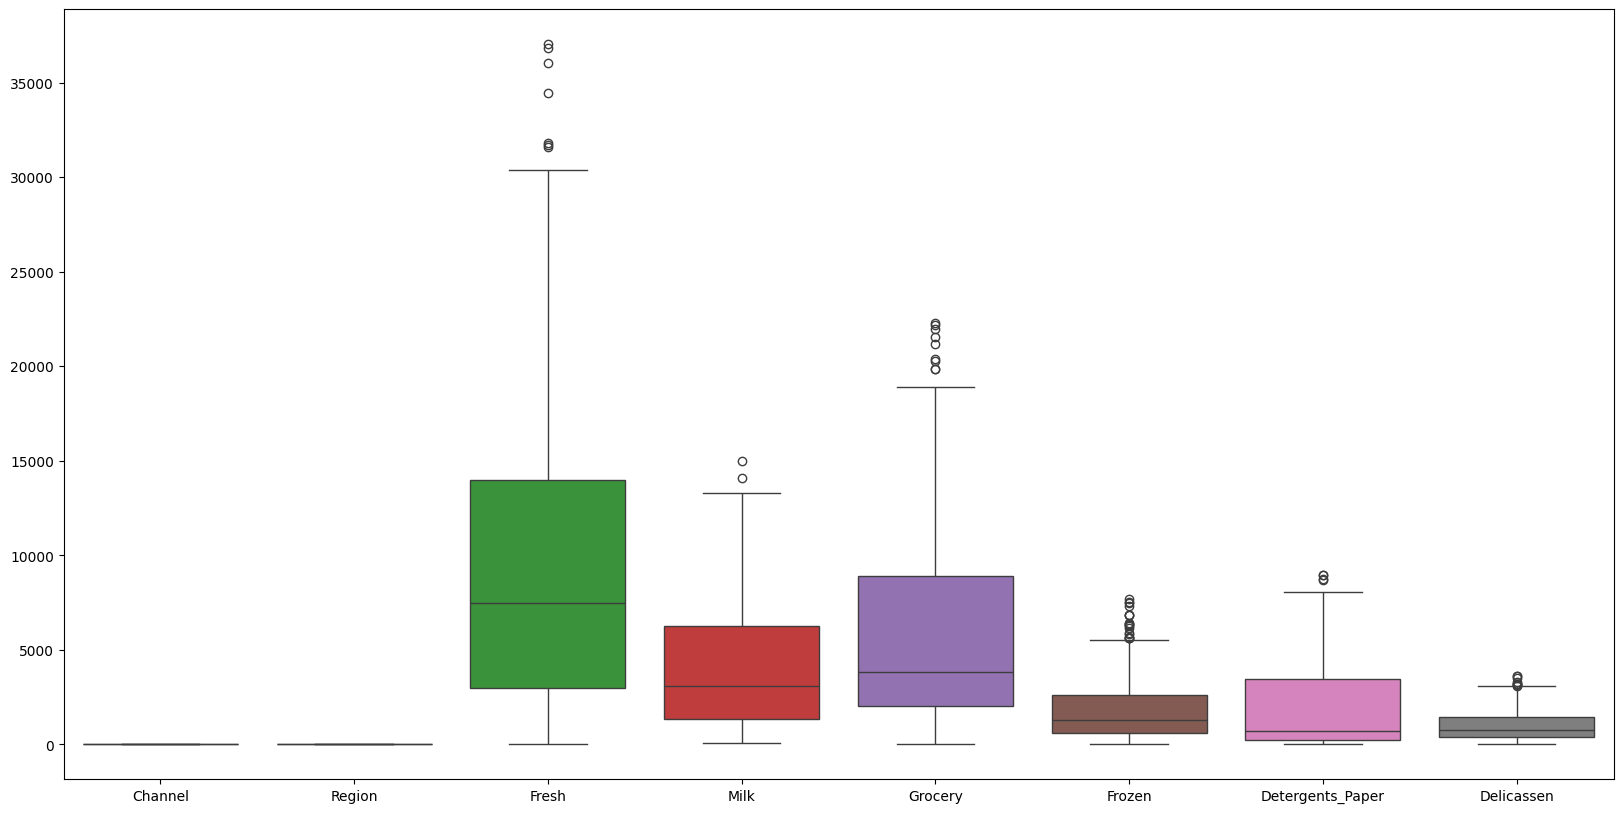

In [7]:
#Boxplot of all the continuous variables
plt.figure(figsize=(20,10))
sns.boxplot(data=dataframe)
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [8]:
from sklearn.cluster import KMeans

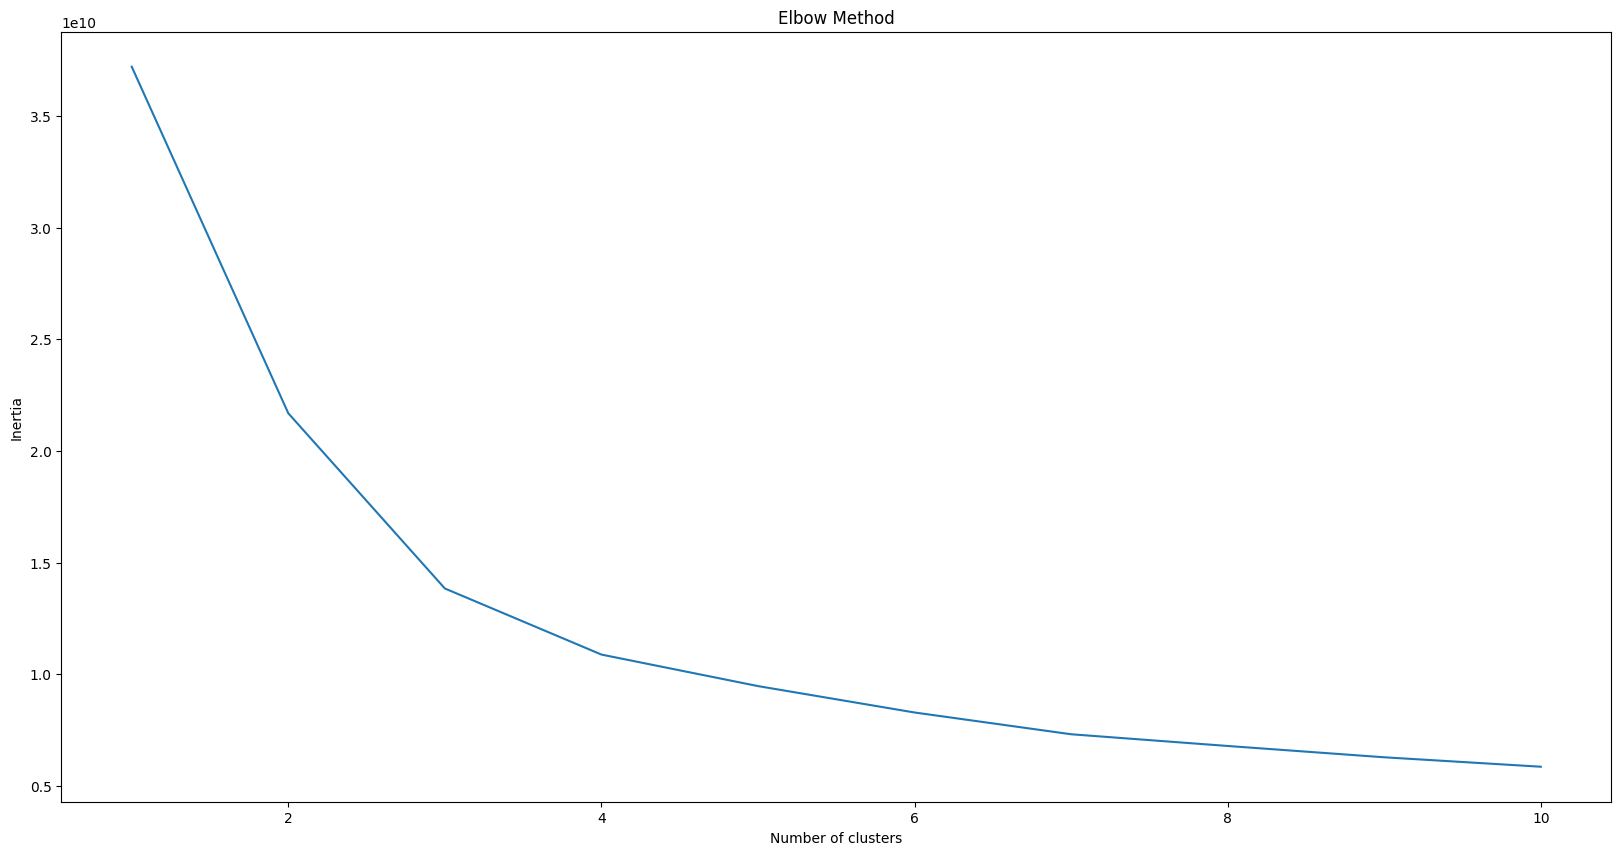

In [9]:
#Creating an initial list 
inertia = []
#Creating a loop to find the optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataframe)
    inertia.append(kmeans.inertia_)
#Plotting the elbow method
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [10]:
#3 clusters seems to be the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(dataframe)
dataframe['Cluster'] = kmeans.predict(dataframe)   #predicting the cluster



In [11]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
3,1,3,13265,1196,4221,6404,507,1788,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [12]:
#Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [13]:
# Drop the cluster columns
dataframe_dropped_1  = dataframe.drop(['Cluster'], axis=1)

In [14]:
dataframe_dropped_1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


In [15]:
final_df = dataframe_dropped_1.copy()

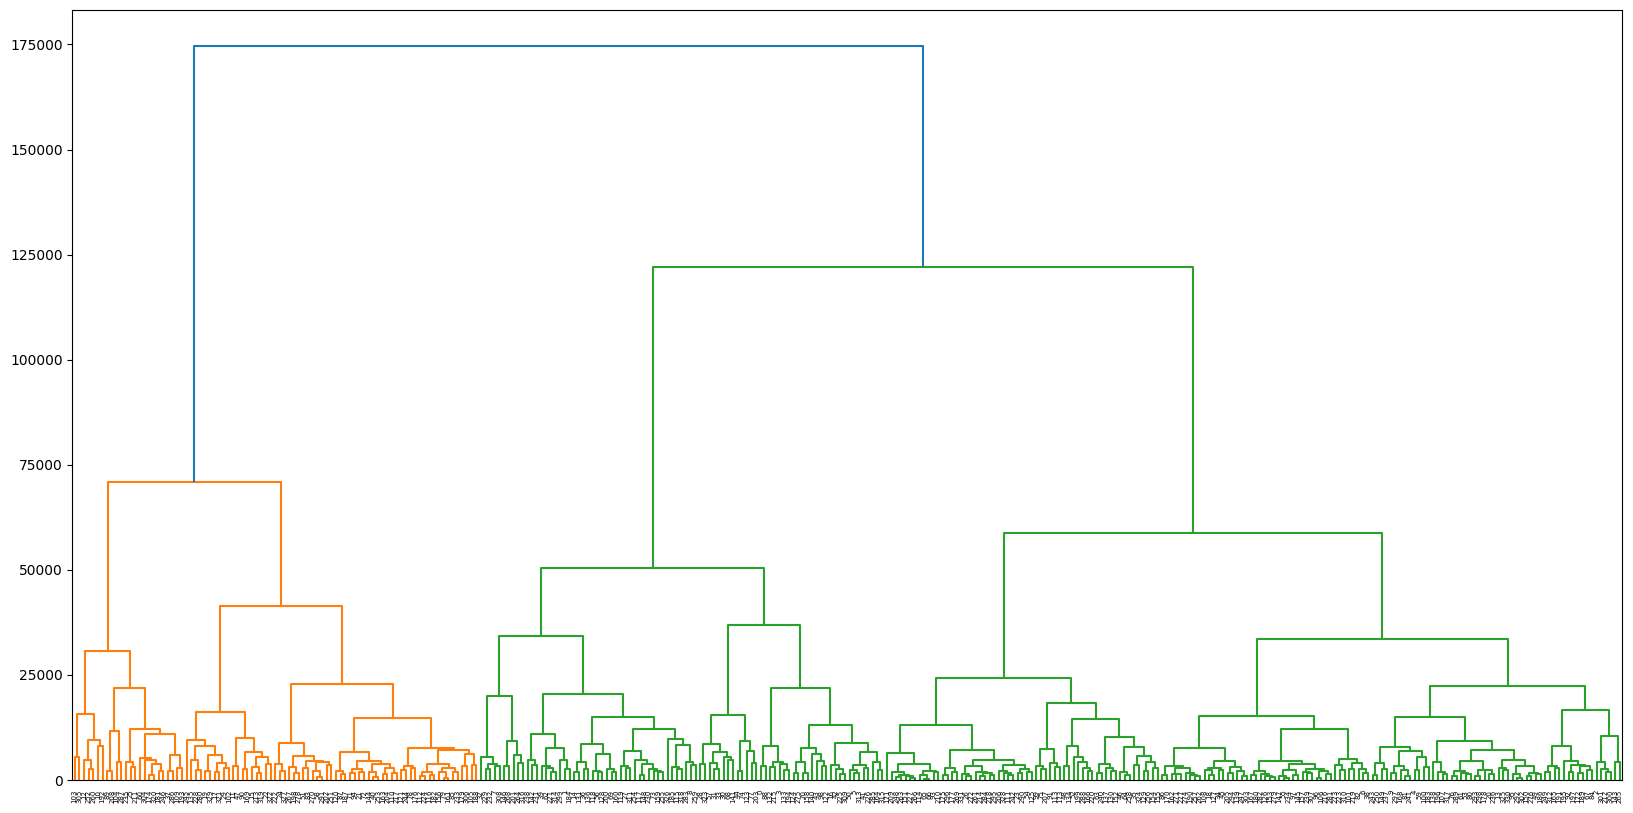

In [16]:
#Creating a dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(dataframe_dropped_1, method='ward'))
plt.show()

In [17]:
#Creating 3 clusters
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
dataframe['H_Cluster'] = agg.fit_predict(dataframe_dropped_1)


In [18]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,H_Cluster
0,2,3,12669,9656,7561,214,2674,1338,2,2
1,2,3,7057,9810,9568,1762,3293,1776,2,2
3,1,3,13265,1196,4221,6404,507,1788,1,1
5,2,3,9413,8259,5126,666,1795,1451,1,2
6,2,3,12126,3199,6975,480,3140,545,1,1


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [19]:
#PCA 
from sklearn.decomposition import PCA

In [20]:
#Creating a PCA object
pca = PCA(n_components=2)
#Fitting the PCA object
principal_components = pca.fit_transform(dataframe_dropped_1)
#Creating a dataframe with the principal components
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
#Concatenating the principal components with the original dataframe
dataframe = pd.concat([dataframe, principal_df], axis=1)


In [21]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,H_Cluster,PC1,PC2
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,2.0,2.0,2193.462447,4864.859617
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2.0,2.0,-3610.093561,5552.398371
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1.0,1.0,-381.974053,1318.786352
5,2.0,3.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,1.0,2.0,-2679.738982,3351.427970
6,2.0,3.0,12126.0,3199.0,6975.0,480.0,3140.0,545.0,1.0,1.0,-3561.715448,-707.564695


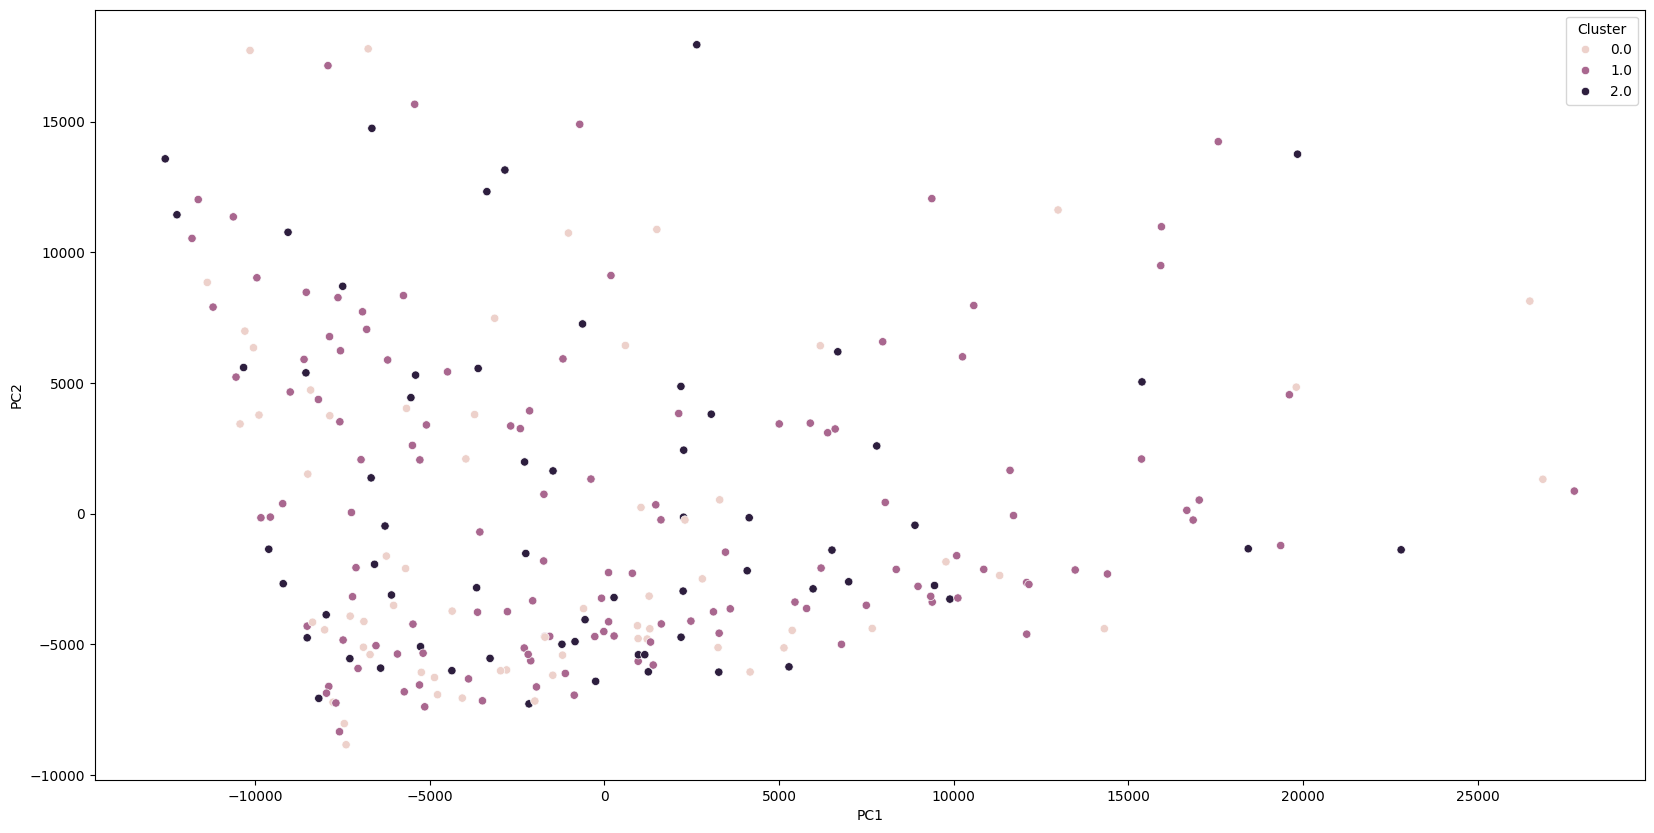

In [23]:
#Plotting the clusters
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='Cluster')
plt.show()

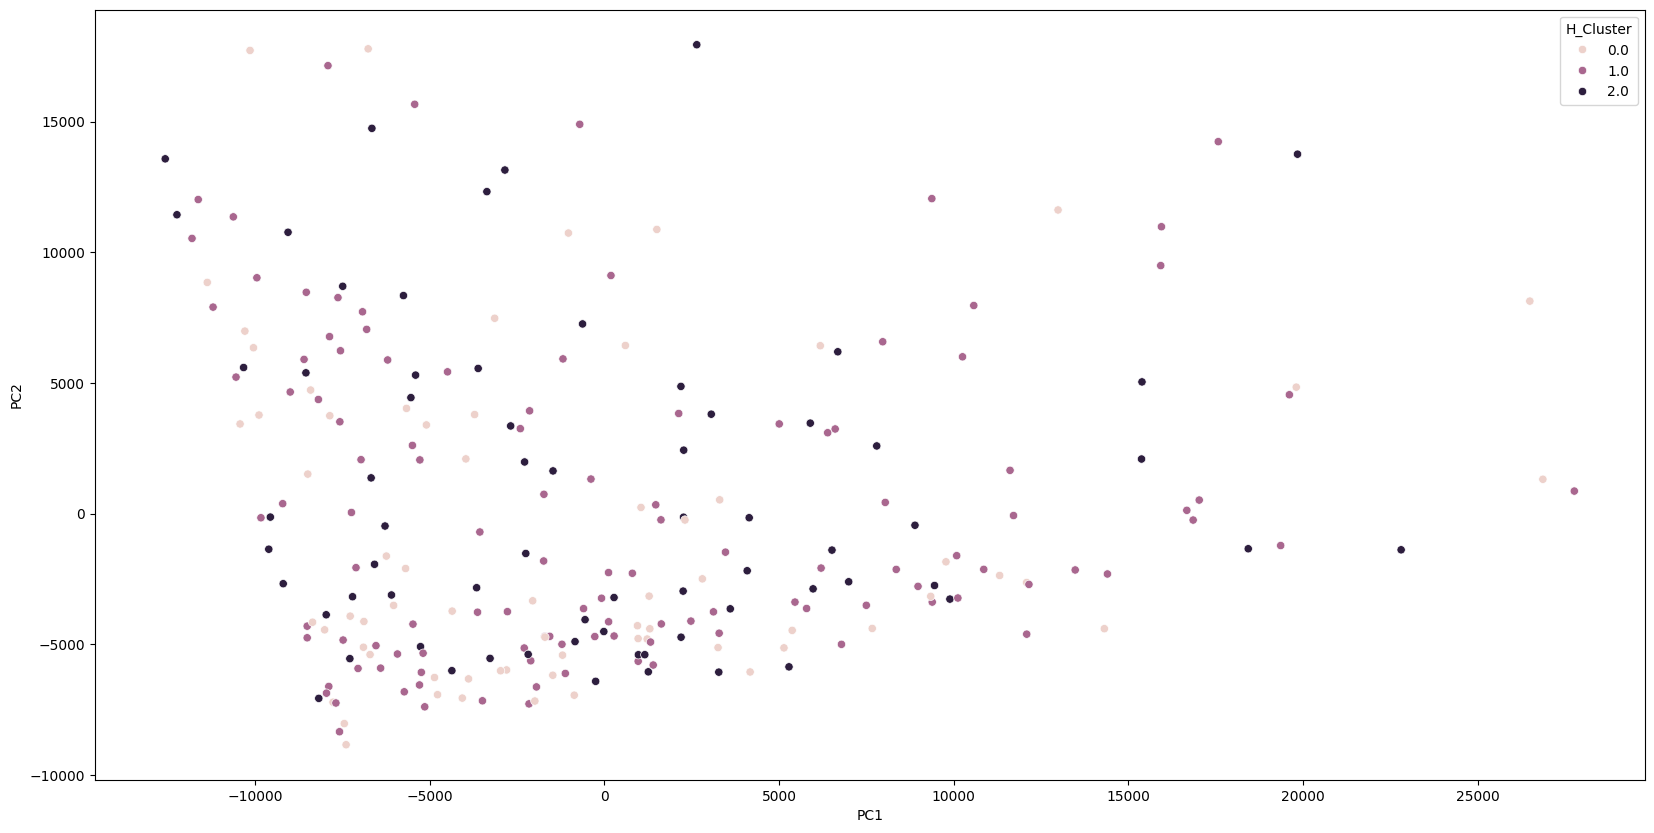

In [24]:
#Plotting the hierarchical clusters
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='H_Cluster')
plt.show()

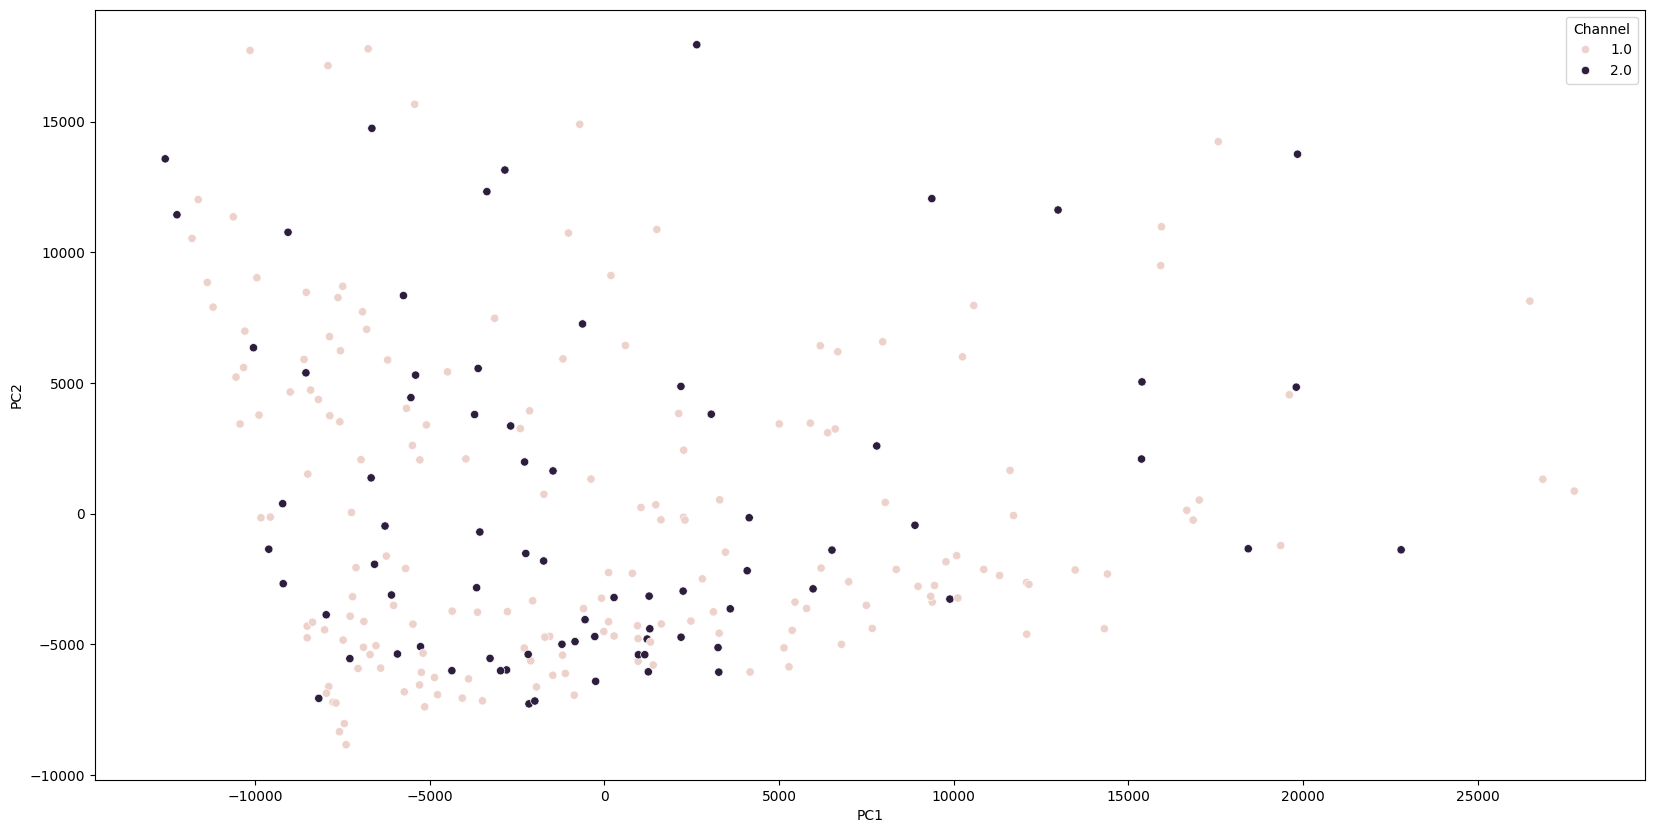

In [25]:
#Plotting the original clusters
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='Channel')
plt.show()

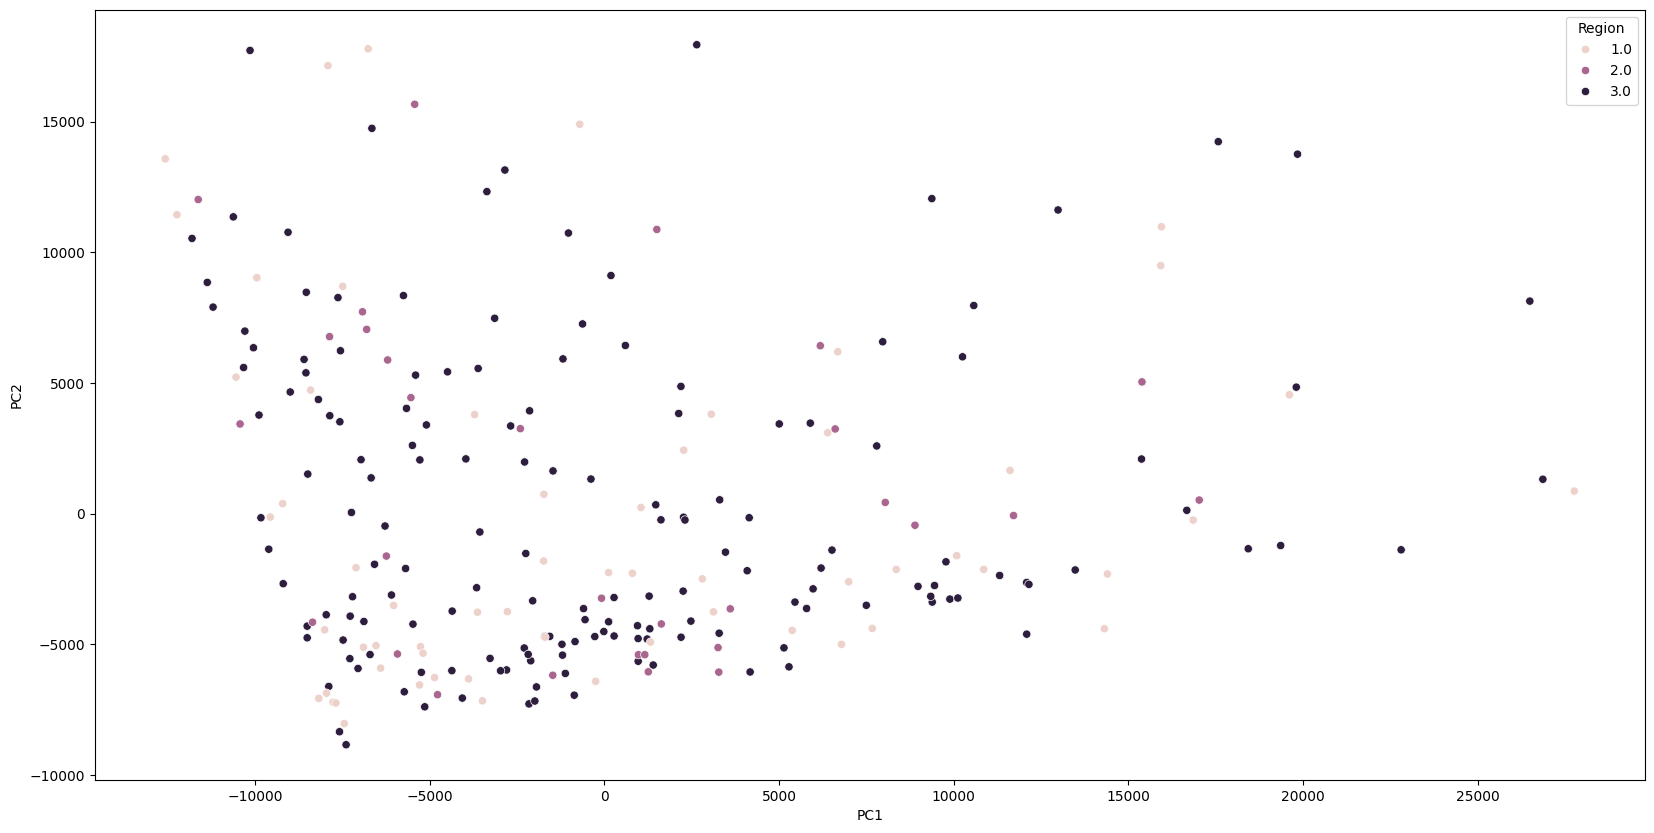

In [26]:
#Plotting the original clusters
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='Region')
plt.show()
#Definitely very varied data

In [ ]:
#Improving the model

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.